***
# <font color=green size=10>Tarefa 3 - Ciência de Dados</font>
***

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


***
***

# <font color=green> Parte 1 - Análise Descritiva de um Conjunto de Dados </font>

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
classes = [0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [5]:
labels_salarios = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [6]:
freq_renda = pd.value_counts(pd.cut(x = dados['Renda'], bins=classes, labels=labels_salarios, include_lowest=True))
freq_renda

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [7]:
perc_renda = pd.value_counts(pd.cut(x = dados['Renda'], bins=classes, labels=labels_salarios, include_lowest=True), normalize=True) * 100
perc_renda

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [8]:
distr_freq = pd.DataFrame(
    {'Frequência': freq_renda, 'Porcentagem (%)': perc_renda.round(2)}
)
distr_freq

,Frequência,Porcentagem (%)
E,49755,64.75
D,18602,24.21
C,7241,9.42
B,822,1.07
A,420,0.55


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

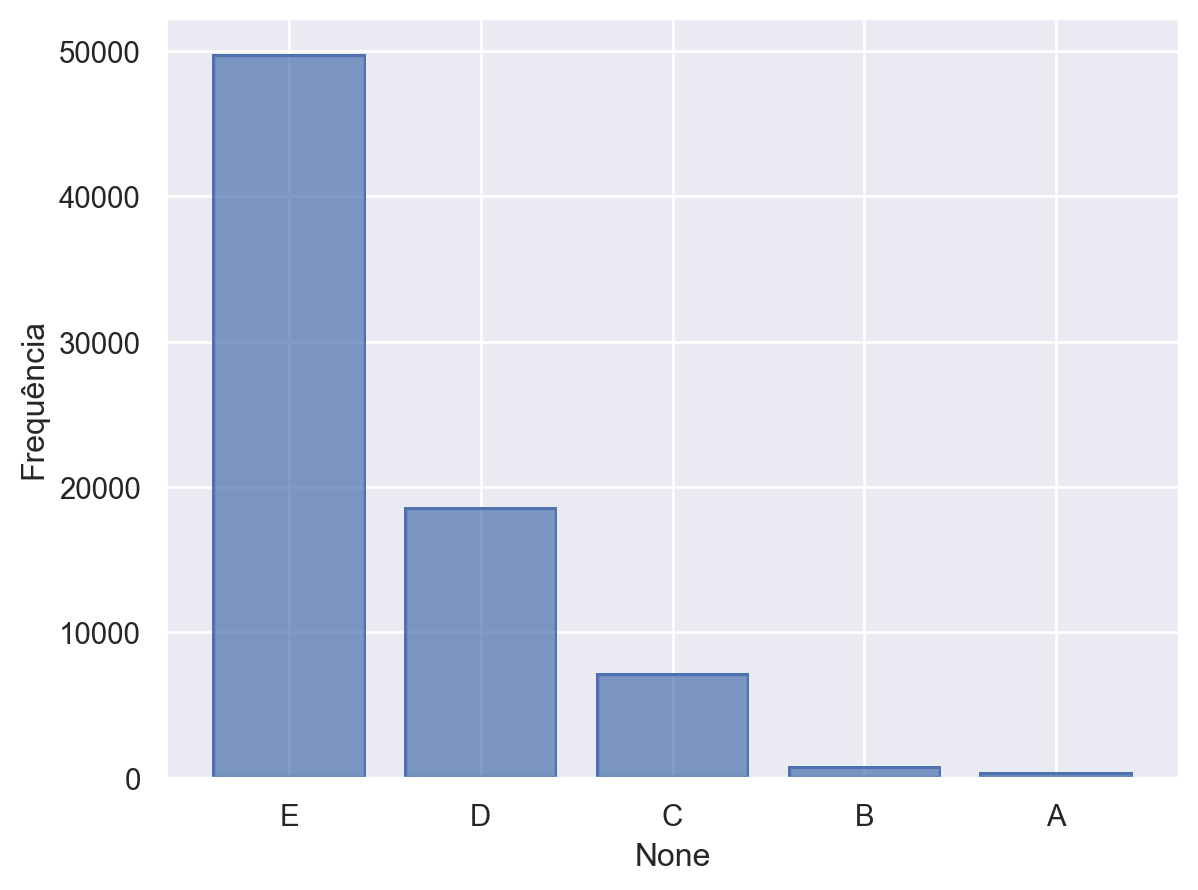

In [9]:
so.Plot(distr_freq.index, distr_freq["Frequência"]).add(so.Bar())

> ### Conclusões

De acordo com o gráfico, as pessoas das classes E e D tem os maiores indice de acordo com IBGE.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

(array([53250.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 23590.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

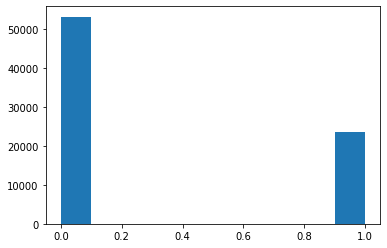

In [10]:
plt.hist(dados['Sexo'])

> ### Conclusões



### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

(array([7.642e+04, 3.680e+02, 3.200e+01, 5.000e+00, 5.000e+00, 6.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000., 180000., 200000.]),
 <BarContainer object of 10 artists>)

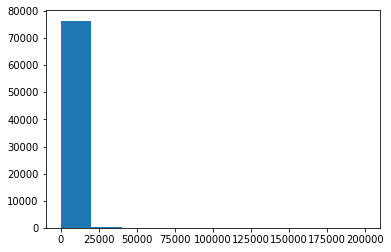

In [11]:
plt.hist(dados['Renda'])

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [12]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

<AxesSubplot: title={'center': 'Distribuição de Frequências - Sexo'}, xlabel='Sexo', ylabel='Count'>

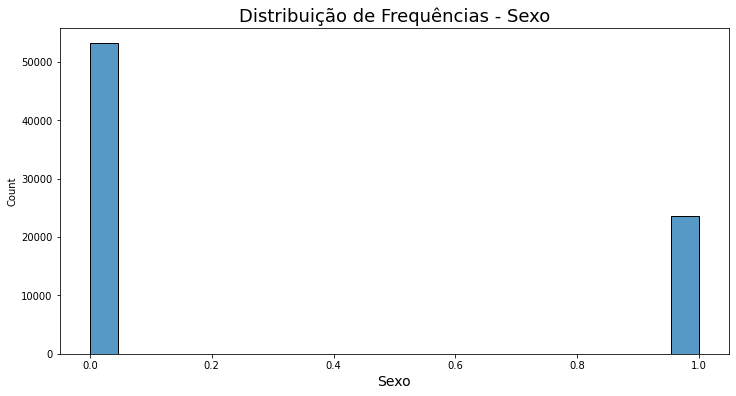

In [13]:
dist_sexo = sns.histplot(dados['Sexo'])

dist_sexo.figure.set_size_inches(12, 6)
dist_sexo.set_title('Distribuição de Frequências - Sexo', fontsize=18)
dist_sexo.set_xlabel('Sexo', fontsize=14)
dist_sexo

<AxesSubplot: title={'center': 'Distribuição de Frequências - Cor'}, xlabel='Cor', ylabel='Count'>

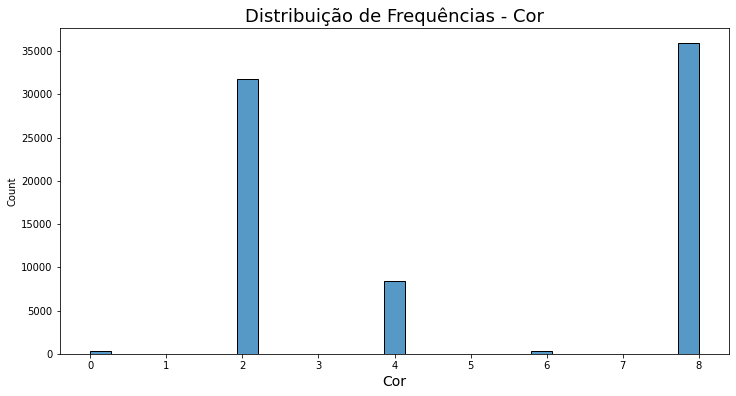

In [14]:
dist_cor = sns.histplot(dados['Cor'])

dist_cor.figure.set_size_inches(12, 6)
dist_cor.set_title('Distribuição de Frequências - Cor', fontsize=18)
dist_cor.set_xlabel('Cor', fontsize=14)
dist_cor

> ### Conclusões

As pessoas da cor pardas possuem mais registros de acordo com o IBGE.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [15]:
dados['Renda'].mean()

2000.3831988547631

### Obtenha a mediana

In [16]:
dados['Renda'].median()

1200.0

### Obtenha a moda

In [17]:
dados['Renda'].mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [18]:
(dados['Renda'] - dados['Renda'].mean()).abs().mean()

1526.4951371638058

### Obtenha a variância

In [19]:
dados['Renda'].var()

11044906.006217021

### Obtenha o desvio-padrão

In [20]:
dados['Renda'].std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [21]:
renda_por_sexo = dados.groupby(['Sexo']).agg({'Renda': ['mean', 'median', 'max']})
renda_por_sexo.rename(index = sexo)

Renda                
                  mean  median     max
Sexo                                  
Masculino  2192.441596  1350.0  200000
Feminino   1566.847393   900.0  120000

In [22]:
renda_por_cor = dados.groupby(['Cor']).agg({'Renda': ['mean', 'median', 'max']})
renda_por_cor.rename(index = cor)

Renda                
                 mean  median     max
Cor                                  
Indígena  1472.887955   788.0  120000
Branca    2679.019331  1500.0  200000
Preta     1442.294840  1000.0   50000
Amarela   4182.920455  2450.0   50000
Parda     1513.596103  1000.0  100000

> ### Conclusões

Percebe-se que as pessoas do sexo masculino possuem renda maiores do que as pessoas do sexo feminino. Também é demonstrado que as pessoas classificadas como Branca e Amarela possuem médias maiores do que as demais, principalmente as pessoas da cor parda.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [23]:
renda_por_sexo = dados.groupby(['Sexo']).agg({'Renda': ['mad', 'var', 'std']})
renda_por_sexo.rename(index = sexo)

C:\Users\jeanc\AppData\Local\Temp\ipykernel_10912\1989727252.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_por_sexo = dados.groupby(['Sexo']).agg({'Renda': ['mad', 'var', 'std']})
C:\Users\jeanc\AppData\Local\Temp\ipykernel_10912\1989727252.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_por_sexo = dados.groupby(['Sexo']).agg({'Renda': ['mad', 'var', 'std']})


Renda                           
                   mad           var          std
Sexo                                             
Masculino  1647.588129  1.289035e+07  3590.312915
Feminino   1212.146168  6.608310e+06  2570.663414

In [24]:
renda_por_cor = dados.groupby(['Cor']).agg({'Renda': ['mad', 'var', 'std']})
renda_por_cor.rename(index = cor)

C:\Users\jeanc\AppData\Local\Temp\ipykernel_10912\1935237400.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_por_cor = dados.groupby(['Cor']).agg({'Renda': ['mad', 'var', 'std']})
C:\Users\jeanc\AppData\Local\Temp\ipykernel_10912\1935237400.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_por_cor = dados.groupby(['Cor']).agg({'Renda': ['mad', 'var', 'std']})
C:\Users\jeanc\AppData\Local\Temp\ipykernel_10912\1935237400.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_por_cor = dados.groupby(['Cor']).agg({'Renda': ['mad', 'var', 'std']})
C:\Users\jeanc\AppData\Local\Temp\ipykernel_10912\1935237400.py:1: FutureWarning: The

Renda                           
                  mad           var          std
Cor                                             
Indígena  1353.145792  4.159087e+07  6449.098217
Branca    2103.131290  1.908087e+07  4368.165306
Preta      906.507603  3.135141e+06  1770.632912
Amarela   3385.914062  2.723900e+07  5219.099832
Parda     1046.887002  4.548909e+06  2132.817184

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [25]:
dados_renda10 = dados[dados['Renda'] <= 10000]

[Text(0, 0, 'Masculino'), Text(0, 1, 'Feminino')]

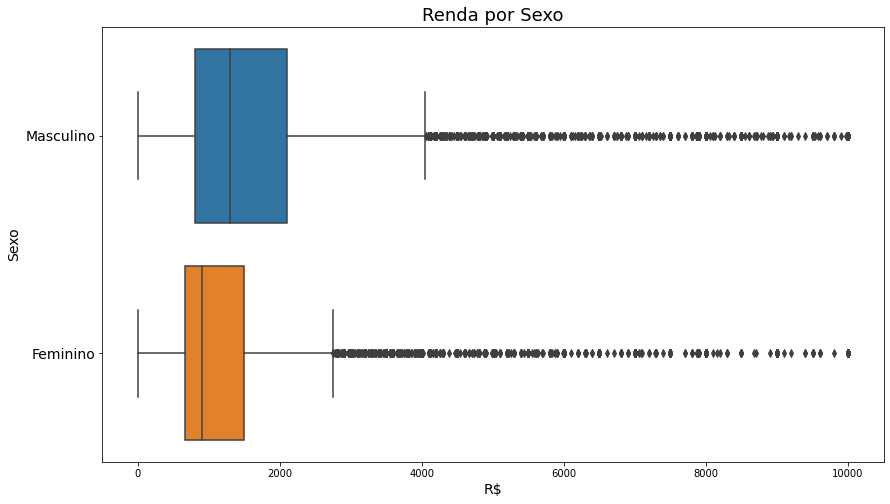

In [26]:
boxPlot_rendaSexo = sns.boxplot(data=dados_renda10, x="Renda", y="Sexo", orient='h')
boxPlot_rendaSexo.figure.set_size_inches(14,8)
boxPlot_rendaSexo.set_title('Renda por Sexo', fontsize=18)
boxPlot_rendaSexo.set_xlabel('R$', fontsize=14)
boxPlot_rendaSexo.set_ylabel('Sexo', fontsize=14)
boxPlot_rendaSexo.set_yticklabels(['Masculino', 'Feminino'], fontsize=14)

[Text(0, 0, 'Indígena'),
 Text(0, 1, 'Branca'),
 Text(0, 2, 'Preta'),
 Text(0, 3, 'Amarela'),
 Text(0, 4, 'Parda')]

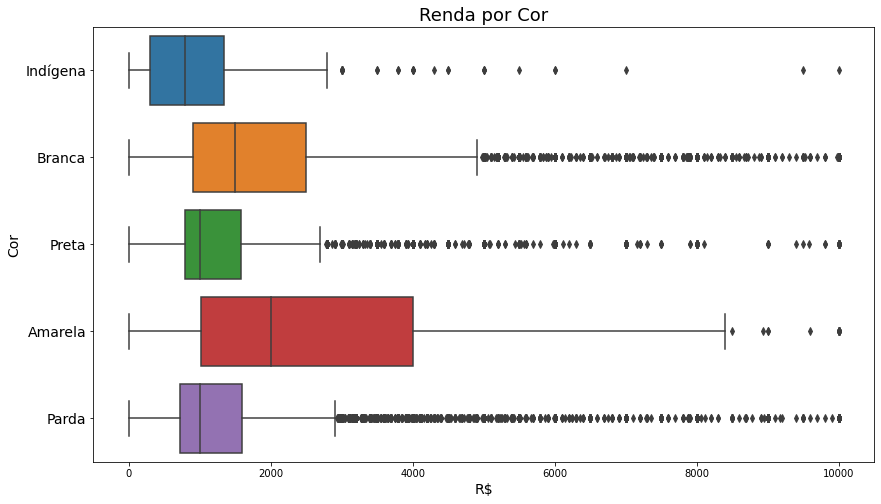

In [27]:
boxPlot_rendaSexo = sns.boxplot(data=dados_renda10, x="Renda", y="Cor", orient='h')
boxPlot_rendaSexo.figure.set_size_inches(14,8)
boxPlot_rendaSexo.set_title('Renda por Cor', fontsize=18)
boxPlot_rendaSexo.set_xlabel('R$', fontsize=14)
boxPlot_rendaSexo.set_ylabel('Cor', fontsize=14)
boxPlot_rendaSexo.set_yticklabels(['Indígena', 'Branca', 'Preta','Amarela', 'Parda'], fontsize=14)

> ### Conclusões

Escreva suas conclusões aqui...

## <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [28]:
from scipy import stats

stats.percentileofscore(dados['Renda'], score=8)

3.7356845393024467

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [29]:
dados.quantile([.99], axis=0)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0.99,53.0,1.0,75.0,8.0,16.0,15000.0,1.884125


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [30]:
renta_estatis_renda_por_estudo = pd.crosstab(dados['Anos de Estudo'], dados['Sexo'], values=dados['Renda'], aggfunc={'mean', 'median', 'max', 'std'})
renta_estatis_renda_por_estudo

max                 mean               median          \
Sexo                 0       1            0            1       0       1   
Anos de Estudo                                                             
1                30000   10000   799.494638   516.201748   700.0   390.0   
2                30000    2000   895.629047   492.771987   788.0   400.0   
3                40000    4000   931.178986   529.911638   788.0   450.0   
4                80000    3500  1109.203862   546.853916   800.0   500.0   
5                50000   10000  1302.329283   704.279111  1000.0   788.0   
6                35000    8000  1338.653218   781.389776  1045.0   788.0   
7                25000    6000  1448.875419   833.732824  1200.0   788.0   
8                40000    9000  1465.497940   830.751004  1200.0   788.0   
9                30000   18000  1639.396667   933.615351  1300.0   800.0   
10               60000   20000  1508.038850   868.021700  1200.0   788.0   
11               45000    6000  1731.270847   925.919225  1218.0   800.0   
12              200000  100000  2117.060504  1286.790889  1500.0  1000.0   
13               30000  120000  2470.330776  1682.313725  1800.0  1200.0   
14               25000   20000  3195.099154  1911.730047  2400.0  1300.0   
15               50000   20000  3706.620269  2226.460457  2500.0  1600.0   
16              200000  100000  6134.279790  3899.513231  4000.0  2800.0   
17                7000    3000  1295.761905   798.174419  1200.0   788.0   

                        std               
Sexo                      0            1  
Anos de Estudo                            
1               1023.904884   639.311534  
2               1331.950552   425.291842  
3               1435.173827   498.234168  
4               2143.800133   424.124446  
5               1419.821787   629.553397  
6               1484.650587   635.782641  
7               1476.628602   574.547028  
8               1419.708673   602.038029  
9               1515.583715   896.781213  
10              2137.664774   973.221652  
11              2078.609734   620.611907  
12              2676.538942  1819.040417  
13              2268.081538  4851.833513  
14              2797.116800  2053.789771  
15              3987.214974  2064.083336  
16              7447.613594  4212.770709  
17               979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [31]:
dados_renda_DezMil = dados.query('Renda < 10000 and Idade == 40')

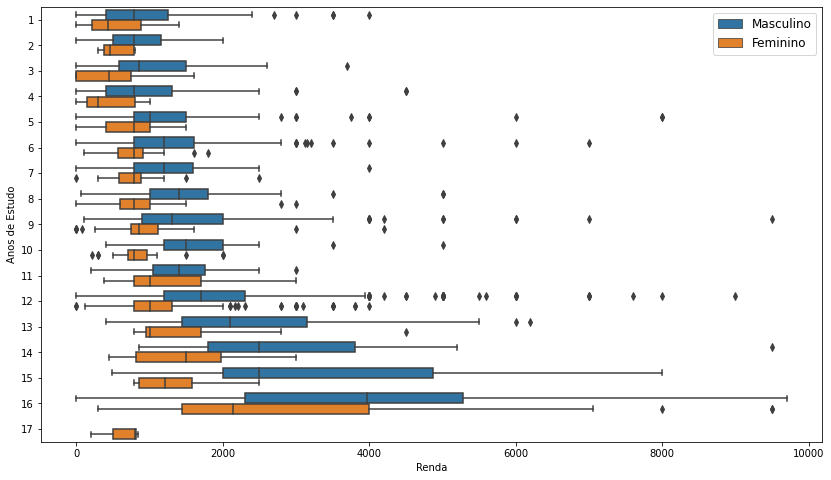

In [32]:
box_plot_DezMil = sns.boxplot(data=dados_renda_DezMil, x="Renda", y="Anos de Estudo", hue='Sexo', orient='h')
box_plot_DezMil.figure.set_size_inches(14,8)
handles, _ = box_plot_DezMil.get_legend_handles_labels()
box_plot_DezMil.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [33]:
renda_por_uf = dados.groupby('UF').agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_por_uf

Renda                             
           mean  median     max          std
UF                                          
11  1789.761223  1200.0   50000  2406.161161
12  1506.091782   900.0   30000  2276.233415
13  1445.130100   900.0   22000  1757.935591
14  1783.588889  1000.0   20000  2079.659238
15  1399.076871   850.0   50000  2053.779555
16  1861.353516  1200.0   15580  2020.688632
17  1771.094946  1000.0   60000  2934.590741
21  1019.432009   700.0   30000  1887.816905
22  1074.550784   750.0   40000  2373.355726
23  1255.403692   789.0   25000  1821.963536
24  1344.721480   800.0   15500  1651.805500
25  1293.370487   788.0   30000  1950.272431
26  1527.079319   900.0   50000  2389.622497
27  1144.552602   788.0   11000  1237.856197
28  1109.111111   788.0   16000  1478.997878
29  1429.645094   800.0  200000  3507.917248
31  2056.432084  1200.0  100000  3584.721547
32  2026.383852  1274.0  100000  3513.846868
33  2496.403168  1400.0  200000  5214.583518
35  2638.104986  1600.0   80000  3503.777366
41  2493.870753  1500.0  200000  4302.937995
42  2470.854945  1800.0   80000  3137.651112
43  2315.158336  1500.0   35000  2913.335783
50  2262.604167  1500.0   42000  3031.419122
51  2130.652778  1500.0   35000  2542.630178
52  1994.580794  1500.0   30000  2221.933065
53  4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<AxesSubplot: xlabel='Renda', ylabel='Estados'>

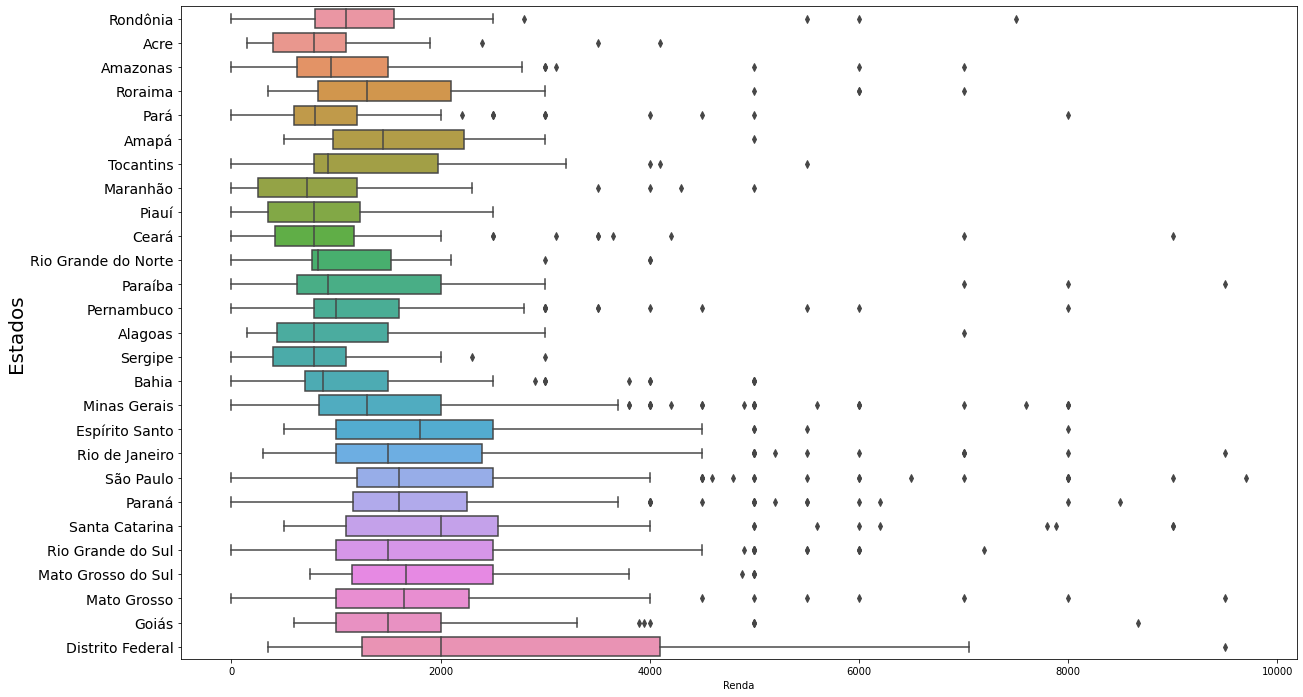

In [34]:
box_plot_DezMil_uf = sns.boxplot(data=dados_renda_DezMil, x="Renda", y="UF", orient='h')
box_plot_DezMil_uf.figure.set_size_inches(20,12)
box_plot_DezMil_uf.set_ylabel('Estados', fontsize=20)
box_plot_DezMil_uf.set_yticklabels([key for key in uf.values()], fontsize=14)
box_plot_DezMil_uf

> ### Conclusões

Escreva suas conclusões aqui...

# <font color=green> Parte 2 - Probabilidades, Amostragem e Estimações </font>

Um cliente nos encomendou um estudo para avaliar o **rendimento dos chefes de domicílio no Brasil**. Para isso precisamos realizar uma nova coleta de dados, isto é, uma nova pesquisa de campo. Após reunião com o cliente foi possível elencar o seguinte conjunto de informações:

> A. O resultado da pesquisa precisa estar pronto em **2 meses**;

> B. Teremos somente **R$\$$ 150.000,00** de recursos para realização da pesquisa de campo; e
    
> C. Seria interessante uma **margem de erro não superior a 10% em relação a média estimada**.

Em nossa experiência com estudos deste tipo, sabemos que o **custo médio por indivíduo entrevistado fica em torno de R$\$$ 100,00**. Com este conjunto de fatos avalie e obtenha o seguinte conjunto de informações para passar ao cliente:


> 1. Para obter uma estimativa para os parâmetros da população (renda dos chefes de domicílio no Brasil), realize uma amostragem aleatória simples em nosso conjunto de dados. Essa amostra deve conter 200 elementos (utilize random_state = 101 para garantir que o mesmo experimento posso ser realizado novamente). Obtenha a média e o desvio-padrão dessa amostra.
    
> 2. Para a **margem de erro** especificada pelo cliente obtenha os **tamanhos de amostra** necessários para garantir os **níveis de confiança de 90%, 95% e 99%**.
    
> 3. Obtenha o **custo da pesquisa** para os três níveis de confiança.
    
> 4. Para o maior nível de confiança viável (dentro do orçamento disponível), obtenha um **intervalo de confiança para a média da população**.
    
> 5. Assumindo um **nível de confiança de 95%**, **quanto a pesquisa custaria ao cliente** caso fosse considerada uma **margem de erro de apenas 5%** em relação a média estimada?


## <font color='blue'>Solução do item 1</font>

### **Seleção de uma amostra aleatório simples**

### <font color='red'>Lembre-se de utilizar *random_state = 101*</font>

In [35]:
dados_random = dados.Renda.sample(n=200, random_state=101)

In [36]:
dados_random

29042     480
62672     250
29973     788
22428    1680
55145    2500
         ... 
50497    3400
3668      780
4872     1000
38670    1000
71730     600
Name: Renda, Length: 200, dtype: int64

### **Dados do problema**

In [37]:
recursos = 150000
custo_entrevista = 100
margem_erro = 0.1
#media_amostra = amostra['Renda'].mean()
#desvio_padrao_amostra = amostra['Renda'].std()

## <font color='blue'>Solução do item 2</font>

### Obtenha a margem de erro

#### <font color='red'>Lembre-se que a margem de erro deve estar na mesma unidade da variável que está sendo estudada (R$)</font>

In [38]:
erro = margem_erro * dados.Renda.mean()
erro

200.0383198854763

In [39]:
def calcula_amostral(tam_amostral):
    calc = (0.5 + (tam_amostral/2))
    return stats.norm.ppf(calc)

### Tamanho da amostra ($1 - \alpha = 90\%$)

In [40]:
norm_tam_amostral90 = calcula_amostral(0.90)
norm_tam_amostral90

1.6448536269514722

### Tamanho da amostra ($1 - \alpha = 95\%$)

In [41]:
norm_tam_amostral95 = calcula_amostral(0.95)
norm_tam_amostral95

1.959963984540054

### Tamanho da amostra ($1 - \alpha = 99\%$)

In [42]:
norm_tam_amostral99 = calcula_amostral(0.99)
norm_tam_amostral99

2.5758293035489004

## <font color='blue'>Solução do item 3</font>

### Custo da pesquisa para o nível de confiança de 90%

In [43]:
#usando os dados
custo = n_dados_90 * custo_medio_por_entrevista
custo

NameError: name 'n_dados_90' is not defined

In [ ]:
#usando a amostra como média e desvio padrão
custo = n_amostra_90 * custo_medio_por_entrevista
custo
print('Para um nível de confiança de 90% o custo da pesquisa seria de R$ {:,.2f}.'.format(custo))

In [ ]:
#saldo do orçamento
print (f'O saldo do orçamento para o custo de uma pesquisa com 90% de confiança é:{orcamento - custo }')

### Custo da pesquisa para o nível de confiança de 95%

In [ ]:
#usando os dados
custo = n_dados_95 * custo_medio_por_entrevista
custo

In [ ]:
#usando a amostra como média e desvio padrão
custo = n_amostra_95 * custo_medio_por_entrevista
custo
print('Para um nível de confiança de 95% o custo da pesquisa seria de R$ {:,.2f}.'.format(custo))

In [ ]:
#saldo do orçamento
print (f'O saldo do orçamento para o custo de uma pesquisa com 95% de confiança é:{orcamento - custo }')

### Custo da pesquisa para o nível de confiança de 99%

In [ ]:
#usando os dados
custo = n_dados_99 * custo_medio_por_entrevista
custo

In [ ]:
#usando a amostra como média e desvio padrão
custo = n_amostra_99 * custo_medio_por_entrevista
custo
print('Para um nível de confiança de 99% o custo da pesquisa seria de R$ {:,.2f}.'.format(custo))

In [ ]:
#saldo do orçamento
print (f'O saldo do orçamento para o custo de uma pesquisa com 99% de confiança é:{orcamento - custo }')

## <font color='blue'>Solução do item 4</font>

In [ ]:
#calculando o intervalo usando os dados da amostra (o último viável)
intervalo = norm.interval(alpha = 0.95, loc=media_aleatorio, scale = desvio_padrao_aleatorio/np.sqrt(n_amostra_95))
intervalo

## <font color='blue'>Solução do item 5</font>

In [ ]:
#calculando o intervalo usando os dados originais
intervalo_dados = norm.interval(alpha=0.95, loc=dados.Renda.mean(), scale= dados.Renda.std()/np.sqrt(n_dados_95))
intervalo_dados

# <font color=green> Parte 3 - Testes de Hipóteses </font>

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

## <font color='red'>Problema</font>

Você é um pesquisador que estuda o mercado de trabalho brasileiro e resolve estudar as diferenças salariais dos trabalhadores dos estados do Rio de Janeiro e de São Paulo. Durante sua pesquisa você verifica que, aparentemente, os rendimentos dos trabalhadores no estado do Rio de Janeiro são mais baixos que os rendimentos dos trabalhadores no estado de São Paulo. Para confirmar esta conclusão realize um teste de hipótese de comparação de médias em cima de duas amostras de trabalhadores dos dois estados. Siga as seguintes etapas:

- Selecione duas amostras de **500 trabalhadores** para cada um dos dois estados (variável UF) para realizar o teste. Utilize o **parâmetro random_state=101**.
- Considere o **nível de significância de 5%**.
- Teste a hipótese de que a **renda média dos trabalhadores do Rio de Janeiro é menor que a renda média dos trabalhadores de São Paulo**.

---

### Seleção das amostras

In [ ]:
rio = dados.query('UF == 33').sample(n=500, random_state=101).Renda

In [ ]:
sao_paulo = dados.query('UF == 35').sample(n=500, random_state=101).Renda

### Dados do problema
Obter média e desvio-padrão para as duas amostras

In [ ]:
media_amostra_rio = rio.mean()
media_amostra_rio

In [ ]:
desvio_amostra_rio = rio.std()
desvio_amostra_rio

In [ ]:
media_amostra_saoPaulo = sao_paulo.mean()
media_amostra_saoPaulo

In [ ]:
desvio_amostra_saoPaulo = sao_paulo.std()
desvio_amostra_saoPaulo

In [ ]:
signif = 0.05
confianca = 1 - signif
n_rj = 500
n_sp = 500
d_0 = 0

## Lembre-se...

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

---

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

(Formule suas hipóteses aqui)

---

### **Passo 2** - escolha da distribuição amostral adequada

### O tamanho da amostra é maior que 30?
#### Resp.: 

### Podemos afirmar que a população se distribui aproximadamente como uma normal?
#### Resp.: 

### O desvio padrão populacional é conhecido?
#### Resp.: 

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [ ]:
probabilidade = significancia
probabilidade

In [ ]:
z_alpha = norm.ppf(probabilidade)
z_alpha.round(2)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

In [ ]:
numerador = (media_amostra_rj - media_amostra_sp) - d_0

denominador = np.sqrt((desvio_padrao_amostra_rj ** 2 / n_rj) + (desvio_padrao_amostra_sp ** 2 / n_sp))

z = numerador / denominador

z

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

### <font color='red'>Critério do valor crítico</font>

In [ ]:
z <= z_alpha

### <font color='red'>Critério do valor $p$</font>

### Utilize DescrStatsW

In [ ]:
test_rj = DescrStatsW(rj)

In [ ]:
test_sp = DescrStatsW(sp)

In [ ]:
test_A = test_rj.get_compare(test_sp)

In [ ]:
z, p_valor = test_A.ztest_ind(alternative='smaller', value=0)
print('Estatística z ->', z)
print('p-valor ->', p_valor)

### Utilize CompareMeans

In [ ]:
test_B = CompareMeans(test_rj, test_sp)

In [ ]:
z, p_valor = test_B.ztest_ind(alternative='smaller', value=0)
print('Estatística z ->', z)
print('p-valor ->', p_valor)

In [ ]:
p_valor <= significancia

### <font color='green'>Conclusão: (Digite sua conclusão aqui)</font>